# Récupération et traitement de données sur une chaîne Youtube

**Le cas de la chaîne Youtube de l'IHU en lien avec les controverses autour du COVID-19**

*Notebook créé par Émilien Schultz - PySHS*

**Contexte** : pendant l'épidémie de COVID-19, l'IHU créé par Pr. Didier Raoult a été au centre de mombreux débats, en particulier sur l'efficacité présupposé d'un traitement par hydroxychloroquine. Il a largement communiqué à travers les médias sociaux, notamment Twitter et Youtube. 

**Objectif**: Récupérer les données de fréquentation des données Youtube de l'IHU comme indicateur de la réception du discours de Didier Raoult.

**Démarche** : comme tout traitement de données, plusieurs étapes s'enchaînent :

- récupération des données
- transformation des données
- exploration des données
- analyse, visualisation et finalisation

**Un enjeu important est de décomposer ces étapes pour pouvoir les réaliser**

## 1. récupérer les données 


L'objectif est de pouvoir collecter des données présentes sur Youtube.

La solution la plus simple est d'identifier un outil qui peut faire le travail pour nous : identifier une bibliothèque qui expoite l'API `python-youtube`

### Installer la bibliothèque

In [3]:
#!pip install --upgrade python-youtube

### Créer la connexion

Créer un compte sur YouTube développeur et récupérer le code de l'API : https://developers.google.com/youtube/registering_an_application

Dans notre cas, nous avons mis ce code d'accès dans le fichier api_youtube (pour qu'il n'apparaisse pas dans cette page)

In [4]:
from pyyoutube import Api # Chargement

# Lecture du code
with open("api_youtube","r") as f:
    key = f.read()

# Création du lien API
api = Api(api_key=key) 

### Comprendre comment ça marche les données de Youtube

Pour cela, il faut se plonger dans le fonctionnement de Youtube, car la bibliothèque permet de circuler dans ses différents objets. Ne pas hésiter à s'inspirer de l'aide de la bibliothèque : https://github.com/sns-sdks/python-youtube

- channel
- vidéo
- playlist

D'abord aller récupérer le channel de l'IHU :https://www.youtube.com/channel/UCFaPzuoXcACu7jplePDfXmA

Il a un numéro unique, qui permet de récupérer les infos

In [6]:
# Récupérer le channel
channel_by_id = api.get_channel_info(channel_id="UCFaPzuoXcACu7jplePDfXmA")

# Sortir les données en JSON
infos = channel_by_id.items[0].to_dict()
infos

{'kind': 'youtube#channel',
 'etag': 'cRnEAHyjdrZ30_7D7ZQdA6zBC9k',
 'id': 'UCFaPzuoXcACu7jplePDfXmA',
 'snippet': {'title': 'IHU Méditerranée-Infection',
  'description': '',
  'customUrl': '@ifr48',
  'publishedAt': '2011-02-28T15:40:09Z',
  'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AL5GRJVH5WgHv3FsnB8rcAH0aEcll_nSYuFPAIBP1ouq=s88-c-k-c0x00ffffff-no-rj',
    'width': 88,
    'height': 88},
   'medium': {'url': 'https://yt3.ggpht.com/ytc/AL5GRJVH5WgHv3FsnB8rcAH0aEcll_nSYuFPAIBP1ouq=s240-c-k-c0x00ffffff-no-rj',
    'width': 240,
    'height': 240},
   'high': {'url': 'https://yt3.ggpht.com/ytc/AL5GRJVH5WgHv3FsnB8rcAH0aEcll_nSYuFPAIBP1ouq=s800-c-k-c0x00ffffff-no-rj',
    'width': 800,
    'height': 800},
   'standard': None,
   'maxres': None},
  'defaultLanguage': None,
  'localized': {'title': 'IHU Méditerranée-Infection', 'description': ''},
  'country': 'FR'},
 'contentDetails': {'relatedPlaylists': {'likes': '',
   'uploads': 'UUFaPzuoXcACu7jplePDfXmA'}},
 'stati

Le format JSON permet de récupérer certaines informations

In [7]:
infos['statistics']

{'viewCount': '124075557',
 'subscriberCount': '609000',
 'hiddenSubscriberCount': False,
 'videoCount': '1008'}

Un channel est composé de plusieurs playlists, qu'il est possible de récupérer par ID du channel

In [9]:
playlists = api.get_playlists(channel_id="UCFaPzuoXcACu7jplePDfXmA",count=None)
playlists.items[0:5]

[Playlist(kind='youtube#playlist', id='PLq3x3mW4dsbTt_hom12UNo18ATcKS3dxG'),
 Playlist(kind='youtube#playlist', id='PLq3x3mW4dsbSNoNsf5gJtRKjtqitEl_By'),
 Playlist(kind='youtube#playlist', id='PLq3x3mW4dsbTeGr0kUD9Dzx8_ofL263JG'),
 Playlist(kind='youtube#playlist', id='PLq3x3mW4dsbSLsyTyrCbc1PT5fMA1bxZm'),
 Playlist(kind='youtube#playlist', id='PLq3x3mW4dsbScpfJcdJVepkKNtYYl2w69')]

Ce sont toutes les playlistes, et il maintenant possible de récupérer les vidéos dans une playliste. On essaye avec une en particulier : 

In [10]:
videos = api.get_playlist_items(playlist_id='PLq3x3mW4dsbTQ42_0Hasr55J-1J6rmeCf',count=None).items
videos

[PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi41NkI0NEY2RDEwNTU3Q0M2'),
 PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi4yODlGNEE0NkRGMEEzMEQy'),
 PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi4wMTcyMDhGQUE4NTIzM0Y5'),
 PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi41MjE1MkI0OTQ2QzJGNzNG'),
 PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi4wOTA3OTZBNzVEMTUzOTMy'),
 PlaylistItem(kind='youtube#playlistItem', id='UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi4xMkVGQjNCMUM1N0RFNEUx')]

Et donc chaque vidéo peut être identifiée par son identifiant unique : 

In [11]:
videos[0].to_dict()

{'kind': 'youtube#playlistItem',
 'etag': 'ERD8MEEtOd8kPCPTj7ddru7SrZE',
 'id': 'UExxM3gzbVc0ZHNiVFE0Ml8wSGFzcjU1Si0xSjZybWVDZi41NkI0NEY2RDEwNTU3Q0M2',
 'snippet': {'publishedAt': '2018-02-12T09:47:16Z',
  'channelId': 'UCFaPzuoXcACu7jplePDfXmA',
  'title': "Les jeudis de l'IHU: 08 février 2018 - 1 - Dr. Matthieu Million",
  'description': 'Microbiote et malnutrition',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/nAMXi_MVyOw/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/nAMXi_MVyOw/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/nAMXi_MVyOw/hqdefault.jpg',
    'width': 480,
    'height': 360},
   'standard': {'url': 'https://i.ytimg.com/vi/nAMXi_MVyOw/sddefault.jpg',
    'width': 640,
    'height': 480},
   'maxres': {'url': 'https://i.ytimg.com/vi/nAMXi_MVyOw/maxresdefault.jpg',
    'width': 1280,
    'height': 720}},
  'channelTitle': 'IHU Méditerranée-Infection',
  'vide

Il ne reste plus qu'à récupérer les infos d'une vidéo particulière :

In [39]:
video_by_id = api.get_video_by_id(video_id="_x-eozrCCNM")
video_by_id.items[0].to_dict()

{'kind': 'youtube#video',
 'etag': 'tDAjE81-VuZc8eg2i1fDrh1_fl4',
 'id': '_x-eozrCCNM',
 'snippet': {'publishedAt': '2022-01-11T14:42:45Z',
  'channelId': 'UCFaPzuoXcACu7jplePDfXmA',
  'title': "Effets de la vaccination sur l'épidémie",
  'description': "Bulletin d'information scientifique de l'IHU - Nous avons le droit d'être intelligents !\nPr Didier Raoult, Directeur de l'IHU Méditerranée Infection",
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/_x-eozrCCNM/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/_x-eozrCCNM/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/_x-eozrCCNM/hqdefault.jpg',
    'width': 480,
    'height': 360},
   'standard': {'url': 'https://i.ytimg.com/vi/_x-eozrCCNM/sddefault.jpg',
    'width': 640,
    'height': 480},
   'maxres': {'url': 'https://i.ytimg.com/vi/_x-eozrCCNM/maxresdefault.jpg',
    'width': 1280,
    'height': 720}},
  'channelTitle': 'I

Une fois qu'on a compris, expérimenté, il suffit de réunir tous ces éléments dans un script un peu plus structuré qui fait les différentes opérations

## Attention, toujours vérifier !!!!

En regardant un peu le premier résultat, on se rend compte que certaines vidéos ne sont pas présentes. En effet, la récupération de toutes les vidéos du canal en laisse de côté. 

On opte alors pour une stratégie différente, en deux temps :

- une solution de scrapping par une bibliothèque ne respectant pas l'API d'abord
- l'API pour récupérer les infos

In [82]:
#pip install scrapetube

In [ ]:
import scrapetube

videos = scrapetube.get_channel("UCFaPzuoXcACu7jplePDfXmA")
videos = [i for i in videos]

In [83]:
len(videos)

1004

### Automatiser le traitement pour récupérer tous les éléments

In [64]:
corpus = [] # corpus vide

#Pour chaque vidéo
for v in videos:

    #Récupérer les infos associées
    video_by_id = api.get_video_by_id(video_id=v["videoId"])

    # L'ajouter au corpus et comme dans certains cas il y a un souci, gérer les problèmes
    try:
        corpus.append(video_by_id.items[0].to_dict())
    except:
        # savoir sur quelle vidéo il y a eu un problème
        print(id_v)

In [13]:
corpus = [] # corpus vide

# récupérer les éléments de la playliste d'intérêt
playlists = api.get_playlists(channel_id="UCFaPzuoXcACu7jplePDfXmA",count=None)

#Pour chaque élément p de cette playliste
for p in playlists.items:
    
    # Récupérer les vidéos associées
    videos = api.get_playlist_items(playlist_id=p.id,count=None).items
    
    #Pour chaque vidéo
    for v in videos:
        
        # Prendre l'id
        id_v = v.to_dict()['snippet']["resourceId"]['videoId']
        
        #Récupérer les infos associées
        video_by_id = api.get_video_by_id(video_id=id_v)
        
        # L'ajouter au corpus et comme dans certains cas il y a un souci, gérer les problèmes
        try:
            corpus.append(video_by_id.items[0].to_dict())
        except:
            # savoir sur quelle vidéo il y a eu un problème
            print(id_v)

GLMnh_bZgts
wJnLBrfJjGQ
KnoNfKs8Sbc
TYtZ58tdzrE
s4akUnZdhvM
On2CjcaHU7c
rW2Oj1dLPPI
Q4zzF0_8R-A


### On sauvegarde pour ne pas perdre les données

In [66]:
import pickle
pickle.dump(corpus, open("IHU-Youtube-Video.pickle","wb"))

In [67]:
len(corpus)

1004

## 2. Transformer les données vers un tableau

La prochaine étape est de passer des données récoltées à un tableau pour faire des statistiques : passage de données non structurées à des données structurées.

### Charger des outils : tableaux et visualisation

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Si on veut, on peut charger les données sauvegardées
import pickle
corpus = pickle.load(open("IHU-Youtube-Video.pickle","rb"))

Construire un tableau en prenant les données qui nous intéressent et en les mettant en forme dans un dataframe

In [69]:
corpus[0]

{'kind': 'youtube#video',
 'etag': 'zzw9z8wbuS-fpIdw8Wn0ZWV0cOY',
 'id': 'T5at_cWbFYw',
 'snippet': {'publishedAt': '2023-03-22T17:49:11Z',
  'channelId': 'UCFaPzuoXcACu7jplePDfXmA',
  'title': 'Les recherches sur le Microbiote - Partie 4',
  'description': 'NASH & Microbiote, Pr Matthieu Million',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/T5at_cWbFYw/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/T5at_cWbFYw/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/T5at_cWbFYw/hqdefault.jpg',
    'width': 480,
    'height': 360},
   'standard': {'url': 'https://i.ytimg.com/vi/T5at_cWbFYw/sddefault.jpg',
    'width': 640,
    'height': 480},
   'maxres': {'url': 'https://i.ytimg.com/vi/T5at_cWbFYw/maxresdefault.jpg',
    'width': 1280,
    'height': 720}},
  'channelTitle': 'IHU Méditerranée-Infection',
  'tags': None,
  'categoryId': '28',
  'liveBroadcastContent': 'none',
  'defa

In [71]:
# extraction uniquement des éléments souhaités
df = [[i['snippet']["title"],i['snippet']['publishedAt'],i['statistics']['viewCount'],i["id"]] for i in corpus]

# mise sous la forme d'un tableau
df = pd.DataFrame(df)

#gestion des dates, changement de formats
df["date"] = pd.to_datetime(df[1])
df = df.set_index("date")
df[2] = df[2].apply(int)

#mise en forme
df.columns = ["Titre","Date","Vues","ID"]

#calcul en millions de vues
df["Vues_M"] = (df["Vues"]/1000000)

df

,Titre,Date,Vues,ID,Vues_M
date,,,,,
2023-03-22 17:49:11+00:00,Les recherches sur le Microbiote - Partie 4,2023-03-22T17:49:11Z,4240,T5at_cWbFYw,0.004240
2023-03-15 16:00:13+00:00,Les recherches sur le Microbiote - Partie 3,2023-03-15T16:00:13Z,3422,Ob2Z7xRuNq0,0.003422
2023-03-08 16:00:08+00:00,Les recherches sur le Microbiote - Partie 2,2023-03-08T16:00:08Z,4551,IWRCZqzBmTs,0.004551
2023-03-01 16:00:26+00:00,Les recherches sur le Microbiote - Partie 1,2023-03-01T16:00:26Z,8858,qBqp2mIojPQ,0.008858
2023-03-01 09:39:57+00:00,New Players of NAFLD pathogenesis (CD44 and SYK),2023-03-01T09:39:57Z,2463,Tf_djdwj57g,0.002463
...,...,...,...,...,...
2018-01-12 12:50:55+00:00,Séminaire H.GROSSET 08-07-2016 - ifr48,2018-01-12T12:50:55Z,3538,nqjni3e0LM0,0.003538
2018-01-12 12:25:03+00:00,Séminaire - Didier Raoult Séminaire - 05/01/2018,2018-01-12T12:25:03Z,3453,5GX87Og4GNQ,0.003453
2015-10-08 14:36:46+00:00,Conférence de Presse de D. Raoult du 07 Octobr...,2015-10-08T14:36:46Z,3679,O015E9FB2m0,0.003679


## 3. Explorer les données

C'est en explorant les données que l'on se rend compte que certaines vidéos manquent, et qu'une autre stratégie est préférable

In [81]:
df[df["Vues_M"]>2]

,Titre,Date,Vues,ID,Vues_M
date,,,,,
2022-01-11 14:42:45+00:00,Effets de la vaccination sur l'épidémie,2022-01-11T14:42:45Z,3400051,_x-eozrCCNM,3.400051
2022-01-04 15:34:00+00:00,Vaccins et Omicron,2022-01-04T15:34:00Z,3543590,x5-5P3ugQ_M,3.543590
2021-07-13 09:38:39+00:00,Le variant Delta & le futur des vaccins,2021-07-13T09:38:39Z,2710444,VY_5JCxUsrc,2.710444
2021-05-18 14:21:20+00:00,"Épidémie et Pass sanitaire, Intégration du vir...",2021-05-18T14:21:20Z,2040400,UVmXvo1FMOc,2.040400
2021-05-11 14:08:36+00:00,Effet des vaccins & Corruption,2021-05-11T14:08:36Z,2283079,0-7R3r5_-EA,2.283079
2020-02-28 10:33:48+00:00,Chloroquine : pourquoi les Chinois se trompera...,2020-02-28T10:33:48Z,2257050,mJl2nPHAo2g,2.257050


In [79]:
df["Titre"].str.contains("Raoult").sum()

51

In [76]:
df["Vues_M"].describe()

count    1004.000000
mean        0.123578
std         0.340269
min         0.000008
25%         0.000064
50%         0.000825
75%         0.036930
max         3.543590
Name: Vues_M, dtype: float64

## 4. et 5. Statistiques et visualisations

Faire une représentation graphique en regroupant par jours les vidéos

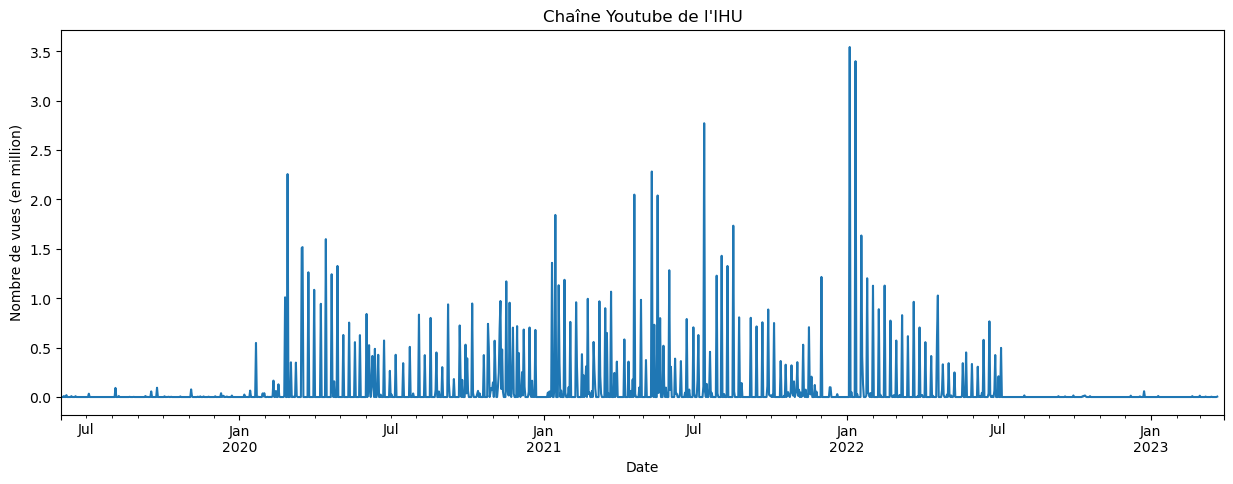

In [80]:
ax = df["Vues_M"].resample("d").sum().fillna(0).plot(figsize=(15,5),style="-")

# Fenêtre temporelle
plt.xlim(pd.to_datetime("2019-06-01"), pd.to_datetime("2023-03-30"))

# Mise en forme et sauvegarde
plt.ylabel("Nombre de vues (en million)")
plt.xlabel("Date")
plt.title("Chaîne Youtube de l'IHU")
plt.savefig("ihu_youtube.png",dpi=200,bbox_inches="tight")

## Aller plus loin

Il est possible d'utiliser le moteur de retranscription de Youtube pour avoir une partie au moins des propos

In [38]:
# pip install youtube_transcript_api

In [40]:
from youtube_transcript_api import YouTubeTranscriptApi

tr = YouTubeTranscriptApi.get_transcript("ngaRgZDENOg",languages=['fr'])
[i["text"] for i in tr][0:10]

['professeur didier rahout pouvez vous',
 'faire un point sur les différents tests',
 'disponibles diagnostics locaux vides',
 "lesquels sont validées qu'elles ne sont",
 'pas valides lesquels sont les plus',
 'efficaces aux nuits si tu as un bon',
 "exemple de d'illustration duché que tout",
 "part dans tous les sens et qu' il n'y a",
 'pas beaucoup de science dans toutes ses',
 'décisions une partie des signes en']

Bon, il y a de la marge d'amélioration